<a href="https://colab.research.google.com/github/maracasabat/PythonWebHW10/blob/main/Hw_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.utils import to_categorical
from keras import regularizers
import matplotlib.pyplot as plt

# Load data
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Preprocessing
X_train = X_train.reshape(60000, 784).astype('float32') / 255.0
X_test = X_test.reshape(10000, 784).astype('float32') / 255.0

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Create model
model = Sequential()
model.add(Dense(2048, activation='relu', input_shape=(784,),kernel_regularizer=regularizers.l2(0.0001), name='hidden_1'))
model.add(Dropout(0.4))
model.add(Dense(1024, activation='relu', kernel_regularizer=regularizers.l2(0.0001), name='hidden_2'))
model.add(Dropout(0.4))
model.add(Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.0001), name='hidden_3'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax', name='output'))

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_1 (Dense)            (None, 2048)              1607680   
                                                                 
 dropout_9 (Dropout)         (None, 2048)              0         
                                                                 
 hidden_2 (Dense)            (None, 1024)              2098176   
                                                                 
 dropout_10 (Dropout)        (None, 1024)              0         
                                                                 
 hidden_3 (Dense)            (None, 512)               524800    
                                                                 
 dropout_11 (Dropout)        (None, 512)               0         
                                                                 
 output (Dense)              (None, 10)               

In [ ]:
# Compile model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train model
history = model.fit(X_train, y_train,
                    batch_size=1024,
                    epochs=50,
                    verbose=1,
                    validation_data=(X_test, y_test))

# Evaluate model
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print('Test accuracy:', test_acc)

Epoch 1/50
59/59 [==============================] - 13s 204ms/step - loss: 1.0314 - accuracy: 0.7349 - val_loss: 0.7387 - val_accuracy: 0.8318
Epoch 2/50
59/59 [==============================] - 15s 256ms/step - loss: 0.6915 - accuracy: 0.8436 - val_loss: 0.6385 - val_accuracy: 0.8570
Epoch 3/50
59/59 [==============================] - 17s 291ms/step - loss: 0.6155 - accuracy: 0.8600 - val_loss: 0.6000 - val_accuracy: 0.8661
Epoch 4/50
59/59 [==============================] - 17s 287ms/step - loss: 0.5696 - accuracy: 0.8692 - val_loss: 0.5829 - val_accuracy: 0.8647
Epoch 5/50
59/59 [==============================] - 17s 297ms/step - loss: 0.5444 - accuracy: 0.8708 - val_loss: 0.5369 - val_accuracy: 0.8747
Epoch 6/50
59/59 [==============================] - 17s 287ms/step - loss: 0.5120 - accuracy: 0.8786 - val_loss: 0.5198 - val_accuracy: 0.8774
Epoch 7/50
59/59 [==============================] - 17s 286ms/step - loss: 0.4915 - accuracy: 0.8822 - val_loss: 0.5121 - val_accuracy: 0.8737

In [ ]:
# Evaluate model
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print('Test accuracy:', test_acc)

Test accuracy: 0.8937000036239624


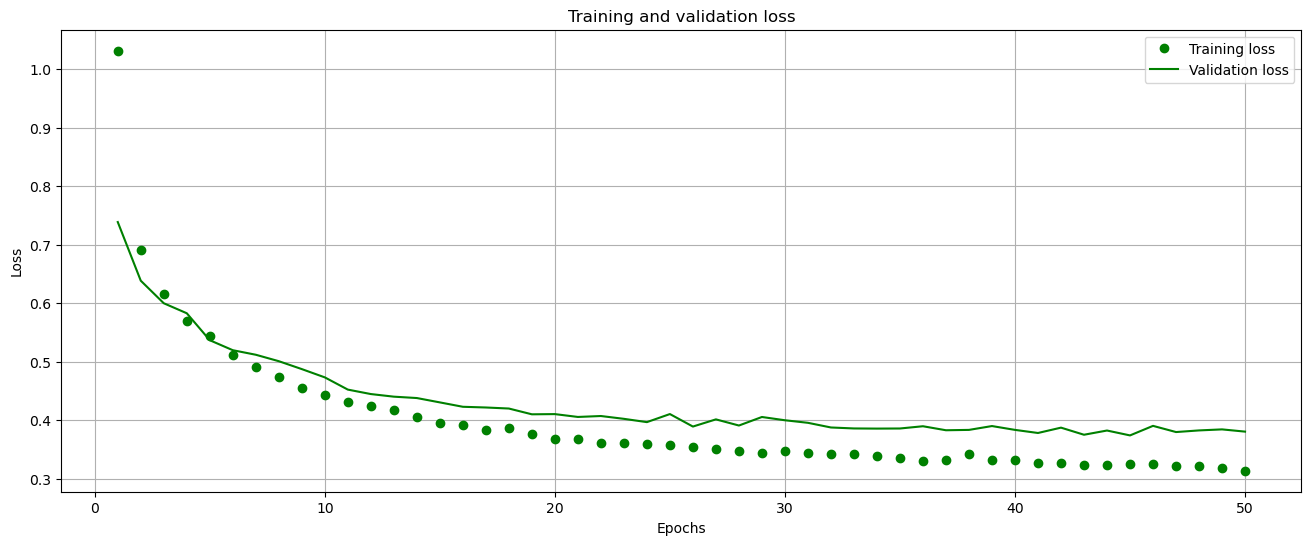

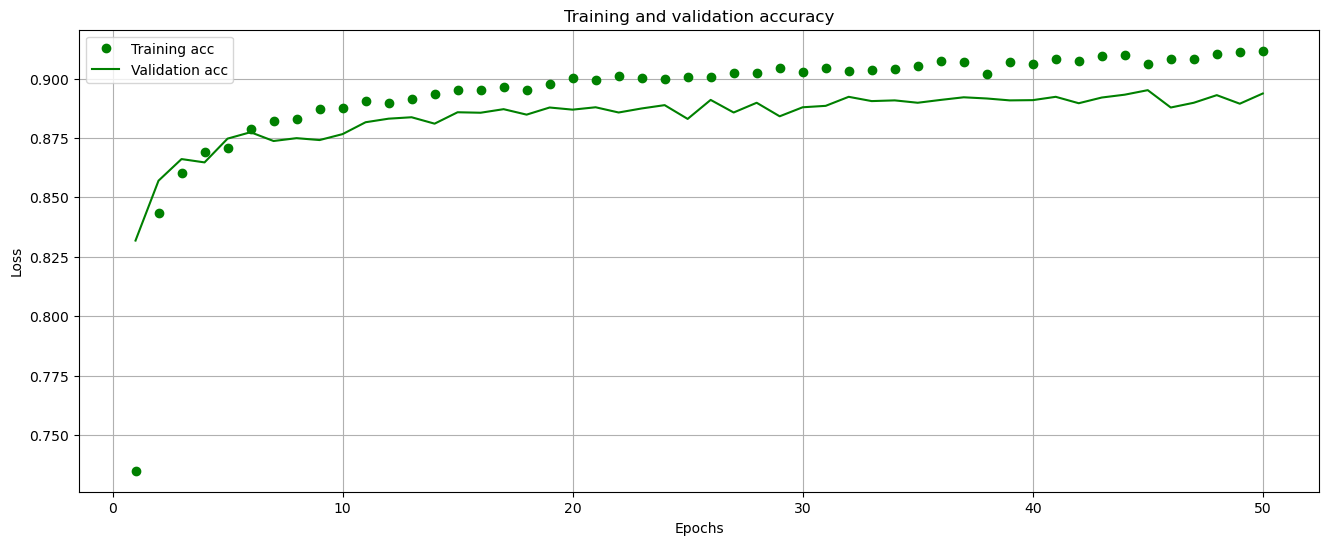

In [ ]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.rcParams["figure.figsize"] = (16, 6)
plt.plot(epochs, loss_values, 'go', label='Training loss')
plt.plot(epochs, val_loss_values, 'g', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()


plt.plot(epochs, history_dict['accuracy'], 'go', label='Training acc')
plt.plot(epochs, history_dict['val_accuracy'], 'g', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()